In [1]:
import pandas as pd
import numpy as np
import glob
import os
import nibabel as nib
import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture
from nibabel.processing import resample_to_output, resample_from_to

In [ ]:
def ReadNii(path):
    img = nib.load(path)
    img_data = img.get_data()
    return img_data, img

def resample(pt_orig_img, mr_img):

    x = resample_from_to(pt_orig_img, (mr_img.shape, mr_img.affine))
    return x

def saveimg(img, path, name):
    try:
        resfile = nib.save(img, os.path.join(path, name+".nii.gz"))
        return True
    except:
        return False
    
def show_img_comare(mr_data, pt_data, n = 100, figuresize = (20,10)):
    plt.figure(figsize = figuresize)
    plt.subplot(1,2,1)
    plt.imshow(np.rot90(mr_data[:,n,:]))
    plt.subplot(1,2,2)
    plt.imshow(np.rot90(pt_data[:,n,:]))
    plt.show()

def petpvc(program, infile, mask, output, pvc_kind='IY+VC'):
    '''
    pvc:
    Geometric transfer matrix - "GTM"
    Labbe approach - "LABBE"
    Richardson-Lucy - "RL"
    Van-Cittert - "VC"
    Region-based voxel-wise correction - "RBV"
    RBV with Labbe - "LABBE+RBV"
    RBV with Van-Cittert - "RBV+VC"
    RBV with Richardson-Lucy - "RBV+RL"
    RBV with Labbe and Van-Cittert - "LABBE+RBV+VC"
    RBV with Labbe and Richardson-Lucy- "LABBE+RBV+RL"
    Single-target correction - "STC"
    Multi-target correction - "MTC"
    MTC with Labbe - "LABBE+MTC"
    MTC with Van-Cittert - "MTC+VC"
    MTC with Richardson-Lucy - "MTC+RL"
    MTC with Labbe and Van-Cittert - "LABBE+MTC+VC"
    MTC with Labbe and Richardson-Lucy- "LABBE+MTC+RL"
    Iterative Yang - "IY"
    Iterative Yang with Van-Cittert - "IY+VC"
    Iterative Yang with Richardson-Lucy - "IY+RL"
    Muller Gartner - "MG"
    Muller Gartner with Van-Cittert - "MG+VC"
    Muller Gartner with Richardson-Lucy - "MG+RL"

    '''
    cmd_fmt = program + " -i %s -m %s -o %s -pvc %s -x 6.0 -y 6.0 -z 6.0"
    cmd = cmd_fmt % (infile, mask, 
                        output,
                        pvc_kind)
    try:
        os.system(cmd)
        print("done!")
    except:
        print("fail!")

        
def make4d(program4d, infile, outfile):
    cmd_fmt = program4d + " -i %s -o %s"
    cmd = cmd_fmt % (infile, outfile)
    try:
        os.system(cmd)
        print("done!")
    except:
        print("fail!") 

In [22]:
# path = "/DataProcess/pools/wxbrain/mprage_pet_process/nifti/SH0000032140"
# mr_path = os.path.join(path, "mprage.nii.gz")
# pt_path = os.path.join(path, "pet_cut.nii.gz")
# pt_path = "/public/liqingxing/QCoutput/1.2.840.113619.2.363.3.3440044043.334.1527228684.355/outputResult.nii.gz"
# mr_path = "/public/liqingxing/QCoutput/1.2.840.113619.2.363.10499743.3637190.20316.1526947809.276/outputResult.nii.gz"
# msk_path = "/public/liqingxing/QCprocess/NiftyReg/mni305_lin_nifti/average305_t1_tal_lin_mask.nii.gz"

# msk = "/public/liqingxing/1.2.840.113619.2.363.10499743.3637190.20316.1526947809.276_3D.nii.gz"

In [6]:
# mr_path = ""
pt_path = ""
msk_path = ""
output_path = ""
pvc_kind = ""
program = "/public/liqingxing/PET/PETPVC/PETPVC_1.2.4/bin/petpvc"
program_4d = "/public/liqingxing/PET/PETPVC/PETPVC_1.2.4/bin/pvc_make4d"
# mr_data, mr_img = ReadNii(mr_path)
# pt_data, pt_img = ReadNii(pt_path)
msk_data, msk_img = ReadNii(msk_path)

if len(msk_data.shape) == 3:
    make4d(program_4d, msk_path, msk_path)

petpvc(program, pt_path, msk_path, output_path, pvc_kind)

In [69]:
mr_data, mr_img = ReadNii("/public/liqingxing/testdata/test_example/MR/1.2.840.113619.2.363.10499743.3637190.20316.1526947809.276.nii.gz")
# pt_data, pt_img = ReadNii("/public/liqingxing/testdata/test_example/PT_SAMP/1.2.840.113619.2.363.3.3440044043.334.1527228684.355.nii")
# msk_data, brain_img = ReadNii(msk_path)
pt_orig_data,pt_orig_img = ReadNii('/public/liqingxing/PET/data/nifti/PT/1.2.840.113619.2.363.3.3440044043.334.1527228684.355.nii')
# seg_data, seg_img = ReadNii(msk)

print(mr.shape)
print(pt_orig_data.shape)


(188, 256, 256)
(188, 256, 256)
(192, 192, 89)


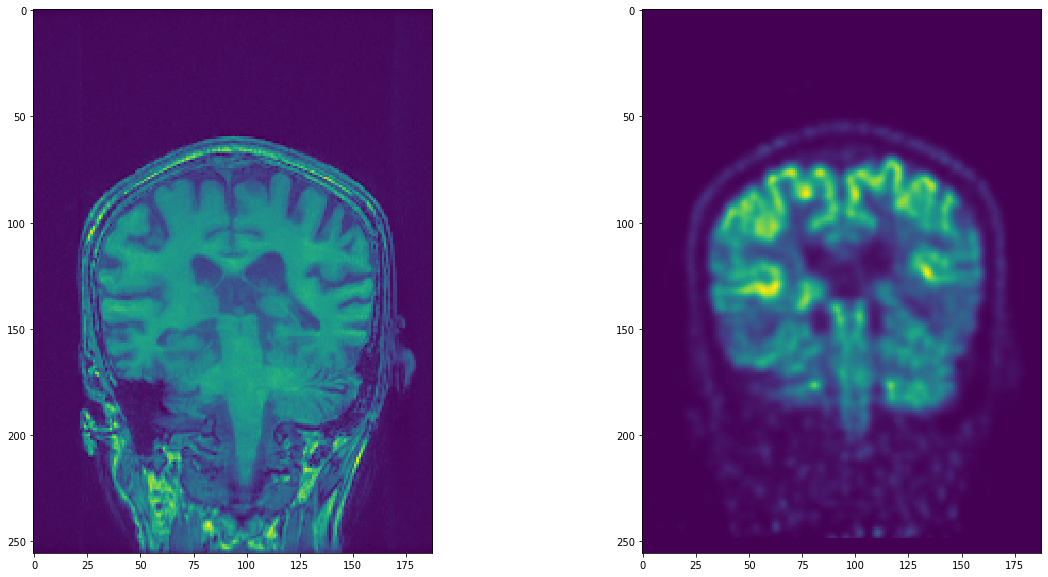

In [88]:
show_img_comare(test_data, x.get_data(),n = 100)

In [6]:
import pandas as pd
PT2MR = "../data/pt2mr.csv"
pt2mr = pd.read_csv(PT2MR)

In [17]:
np.where(name == pt2mr["PT"])[0][0]

5

In [22]:
import re
def getbname(infile):
    '''
    file the base name of a string
    '''
    bname = os.path.basename(infile)
    if ".nii.gz" in bname:
        tag = re.sub("\.nii\.gz", "", bname)
    elif ".nii" in bname:
        tag = re.sub("\.nii", "", bname)
    else:
        tag = bname
       
    return tag

In [23]:
msk = "/public/liqingxing/1.2.840.113619.2.363.10499743.3637190.20316.1526947809.276_3D.nii.gz"

In [33]:
def gen_data_list(input_path):
    '''
    find all the nii or nii.gz files
    '''
    allpath = glob.glob(os.path.join(input_path,"**"), recursive=True)
    print(allpath)
    img_list = []
    for file in allpath:
        if file[-1] == "/":
            file = file[:-1]
        if ".nii" in os.path.basename(file) or ".nii.gz" in os.path.basename(file):
            img_list.append(file)
    return img_list    


In [36]:
gen_data_list("/public/liqingxing/PET/data/nifti")

['/public/liqingxing/PET/data/nifti/', '/public/liqingxing/PET/data/nifti/MR', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21732.1531958198.450.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.453.5554020.7743728.23316.1572571064.846.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.20899.1536797242.495.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.22369.1563495086.497.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21322.1536813018.300.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.22689.1542154383.841.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21344.1546390387.980.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21680.1533082587.226.nii.gz', '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.363719

['/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21732.1531958198.450.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.453.5554020.7743728.23316.1572571064.846.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.20899.1536797242.495.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.22369.1563495086.497.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21322.1536813018.300.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.22689.1542154383.841.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21344.1546390387.980.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.21680.1533082587.226.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR/1.2.840.113619.2.363.10499743.3637190.22143.1563321019.784.nii.gz',
 '/public/liqingxing/PET/data/nifti/MR

In [39]:
a = "/public/liqingxing/1.2.840.113619.2.363.10499743.3637190.20316.1526947809.276_3D.nii.gz"

'z'

'/public/liqingxing/PET/data/nift'